In [1]:
'''
======================
3D surface (color map)
======================

Plotting the 3D surface of modReLU activations.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import tensorflow as tf
%matplotlib inline

/Users/ldalmeida/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def modReLU(z, bias): # relu(|z|+b) * (z / |z|)
    norm = tf.abs(z)
    scale = tf.nn.relu(norm + bias) / (norm + 1e-6)
    scaled = tf.complex(tf.real(z)*scale, tf.imag(z)*scale)
    return scaled

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
sess = tf.Session()
with sess.as_default():
    R = tf.complex(X, Y)
    modRelu = modReLU(R, -0.5)
    inter_abs = tf.abs(modRelu)
    Z_abs = inter_abs.eval()
    inter_angle = tf.angle(modRelu)
    Z_angle = inter_angle.eval()
    inter_real = tf.real(modRelu)
    Z_real = inter_real.eval()
    inter_imag = tf.imag(modRelu)
    Z_imag = inter_imag.eval()

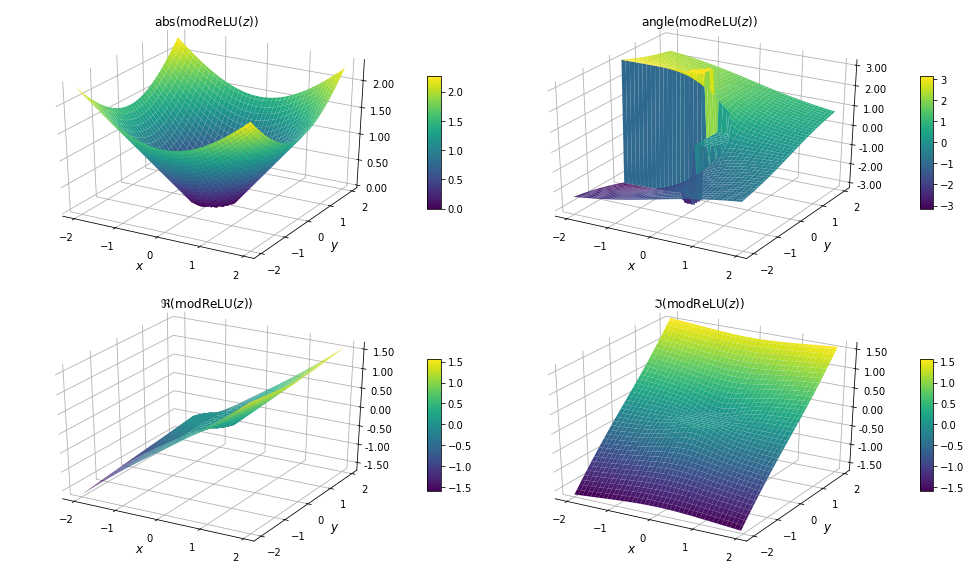

In [6]:
fig = plt.figure(figsize=(14, 8))
for ix,z_axis,title,ticks in zip([1,2,3,4],[Z_abs,Z_angle,Z_real,Z_imag],
                           ['abs(modReLU($z$))', 'angle(modReLU($z$))', '$\Re$(modReLU($z$))', '$\Im$(modReLU($z$))'],
                           [[0.0,0.5,1.0,1.5,2.0],[-3,-2,-1,0,1,2,3],[-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5],
                            [-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5]]     ):
    ax = fig.add_subplot(2,2,ix, projection='3d')

    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # Plot the surface.
    surf = ax.plot_surface(X, Y, z_axis, cmap=plt.cm.viridis,
                           linewidth=1, antialiased=True)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_yticks([-2,-1,0,1,2])
    ax.set_zticks(ticks)
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$y$', fontsize=12)
    ax.set_title(title, fontsize=12)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)
fig.tight_layout()
plt.savefig('../plots/modReLU.png')
plt.show()